# Read and Clean Data

In [2]:
import os
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import statsmodels
import statsmodels.api as sm

# chdir 改变当前工作目录到指定的路径
os.chdir('/Users/zhangle/百度云同步盘/工作/measles')
files = os.listdir()

In [3]:
# 开发环境
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('statsmodels: {}'.format(statsmodels.__version__))

pandas: 0.19.2
numpy: 1.13.0
sklearn: 0.18.2
matplotlib: 2.0.2
statsmodels: 0.6.1


In [4]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')

In [5]:
# 中文乱码设置
matplotlib.matplotlib_fname() # matplotlib配置文件位置
matplotlib.get_cachedir() # 删除~/.matplotlib/下的所有缓存文件
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [6]:
# 读取数据
measles = pd.read_excel('麻疹数据有发病率.xlsx')
measles.head()

,地区编码,地区名称,年份,疾病名称,发病数,死亡数,发病率（1/10万）,死亡率（1/10万）
0,0,全国,1950,麻疹,132167,8534,44.08,2.85
1,11000000,北京市,1950,麻疹,809,160,39.73,7.86
2,12000000,天津市,1950,麻疹,0,0,0.00,0.00
3,13000000,河北省,1950,麻疹,29177,1708,95.14,5.57
4,14000000,山西省,1950,麻疹,7628,643,67.13,5.66


In [7]:
# 删除无用列
measles = measles.drop(['疾病名称'],axis=1)
measles.index = range(0,len(measles))

In [8]:
measles.tail()

,地区编码,地区名称,年份,发病数,死亡数,发病率（1/10万）,死亡率（1/10万）
1984,62000000,甘肃省,2014,276,1,1.0689,0.0039
1985,63000000,青海省,2014,710,2,12.2882,0.0346
1986,64000000,宁 夏,2014,67,0,1.0242,0.0000
1987,65000000,新疆,2014,1263,4,5.5779,0.0177
1988,66000000,建设兵团,2014,103,1,3.8128,0.0370


In [9]:
# rename列名
measles.columns = ['Area_code','Area','Year','No_of_cases','No_of_deaths','Incidence_rate','Death_rate']

In [10]:
# 去除 Area列 文字间的空格 (第二次给的原始数据没空格)
# u unicode
for i in np.arange(0,len(measles)):
    measles.ix[i,'Area'] =  measles.ix[i,'Area'].replace(u'\xa0', u'')

#### 存清洗好的数据

In [14]:
# ./ 向上一级
# ../ 向上上一级
measles.to_excel('./measles.xlsx')

## 全国麻疹发病／死亡情况

In [11]:
quanguo = measles.ix[measles.Area == '全国',:]
quanguo.index = pd.Index(sm.tsa.datetools.dates_from_range('1950','2014'))
quanguo.head()
quanguo.count()

Area_code         65
Area              65
Year              65
No_of_cases       65
No_of_deaths      65
Incidence_rate    65
Death_rate        65
dtype: int64

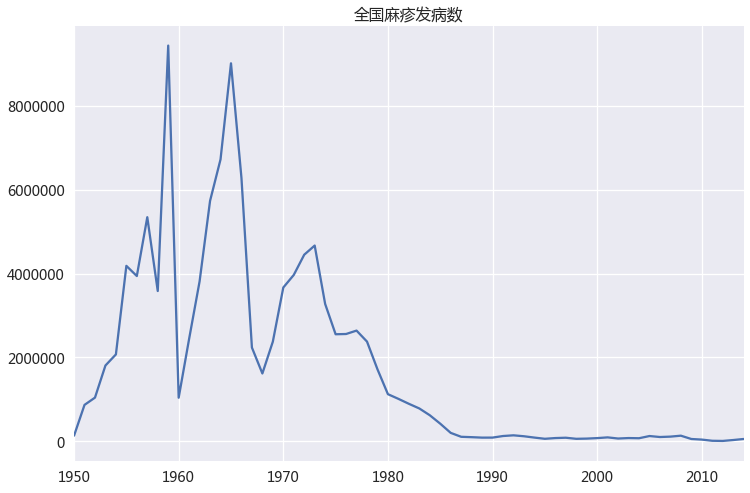

In [12]:
fig = plt.figure()
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
# from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
quanguo.No_of_cases.plot(figsize=(12,8), title= '全国麻疹发病数', fontsize=14, ax=ax)
plt.show()
# plt.savefig('month_TB.png', bbox_inches='tight')

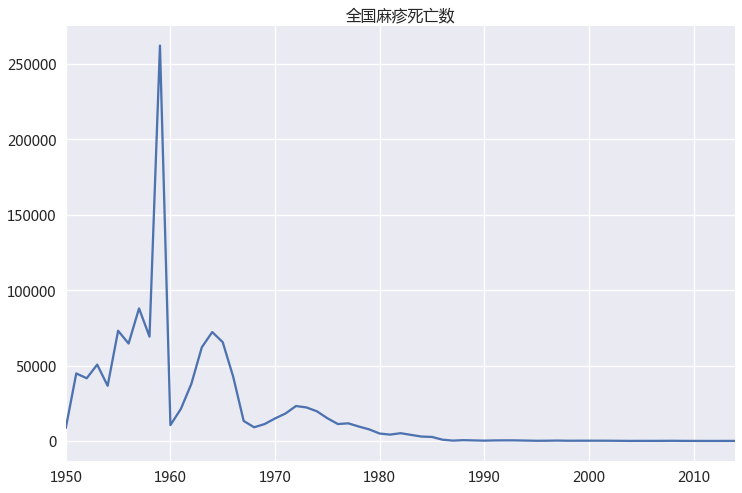

In [13]:
quanguo.No_of_deaths.plot(figsize=(12,8), title= '全国麻疹死亡数', fontsize=14)

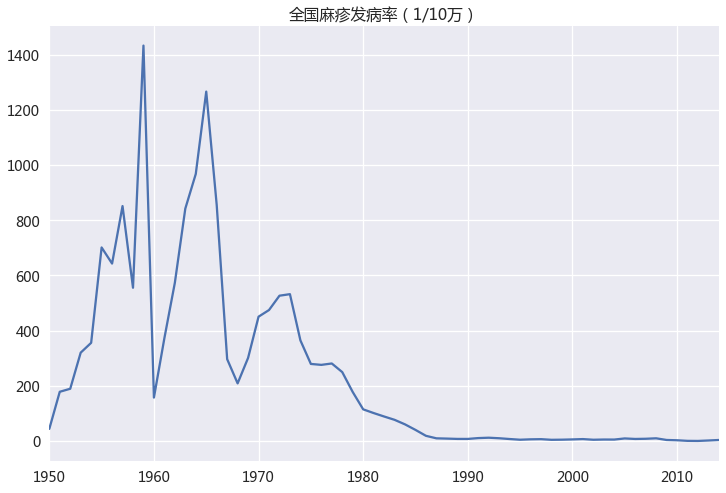

In [14]:
quanguo.Incidence_rate.plot(figsize=(12,8), title= '全国麻疹发病率（1/10万）', fontsize=14)

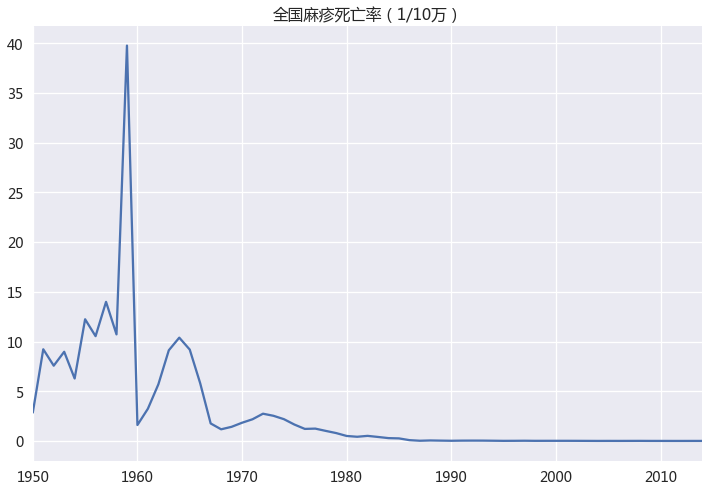

In [15]:
quanguo.Death_rate.plot(figsize=(12,8), title= '全国麻疹死亡率（1/10万）', fontsize=14)

## 32个省市自治区1950-2014年麻疹发病数

In [16]:
# 删除一个元素from list: remove pop del
provinces = measles.Area.unique()
provinces[-2]
# 删除一个元素from array: numpy.delete(a, index)
areas = measles.Area.unique()
provinces = np.delete(provinces, [0,32])
provinces

array(['北京市', '天津市', '河北省', '山西省', '内蒙古', '辽宁省', '吉林省', '黑龙江省', '上海市',
       '江苏省', '浙江省', '安徽省', '福建省', '江西省', '山东省', '河南省', '湖北省', '湖南省',
       '广东省', '广西', '四川省', '贵州省', '云南省', '陕西省', '甘肃省', '青海省', '宁夏', '新疆',
       '西藏', '海南省', '重庆市', '建设兵团'], dtype=object)

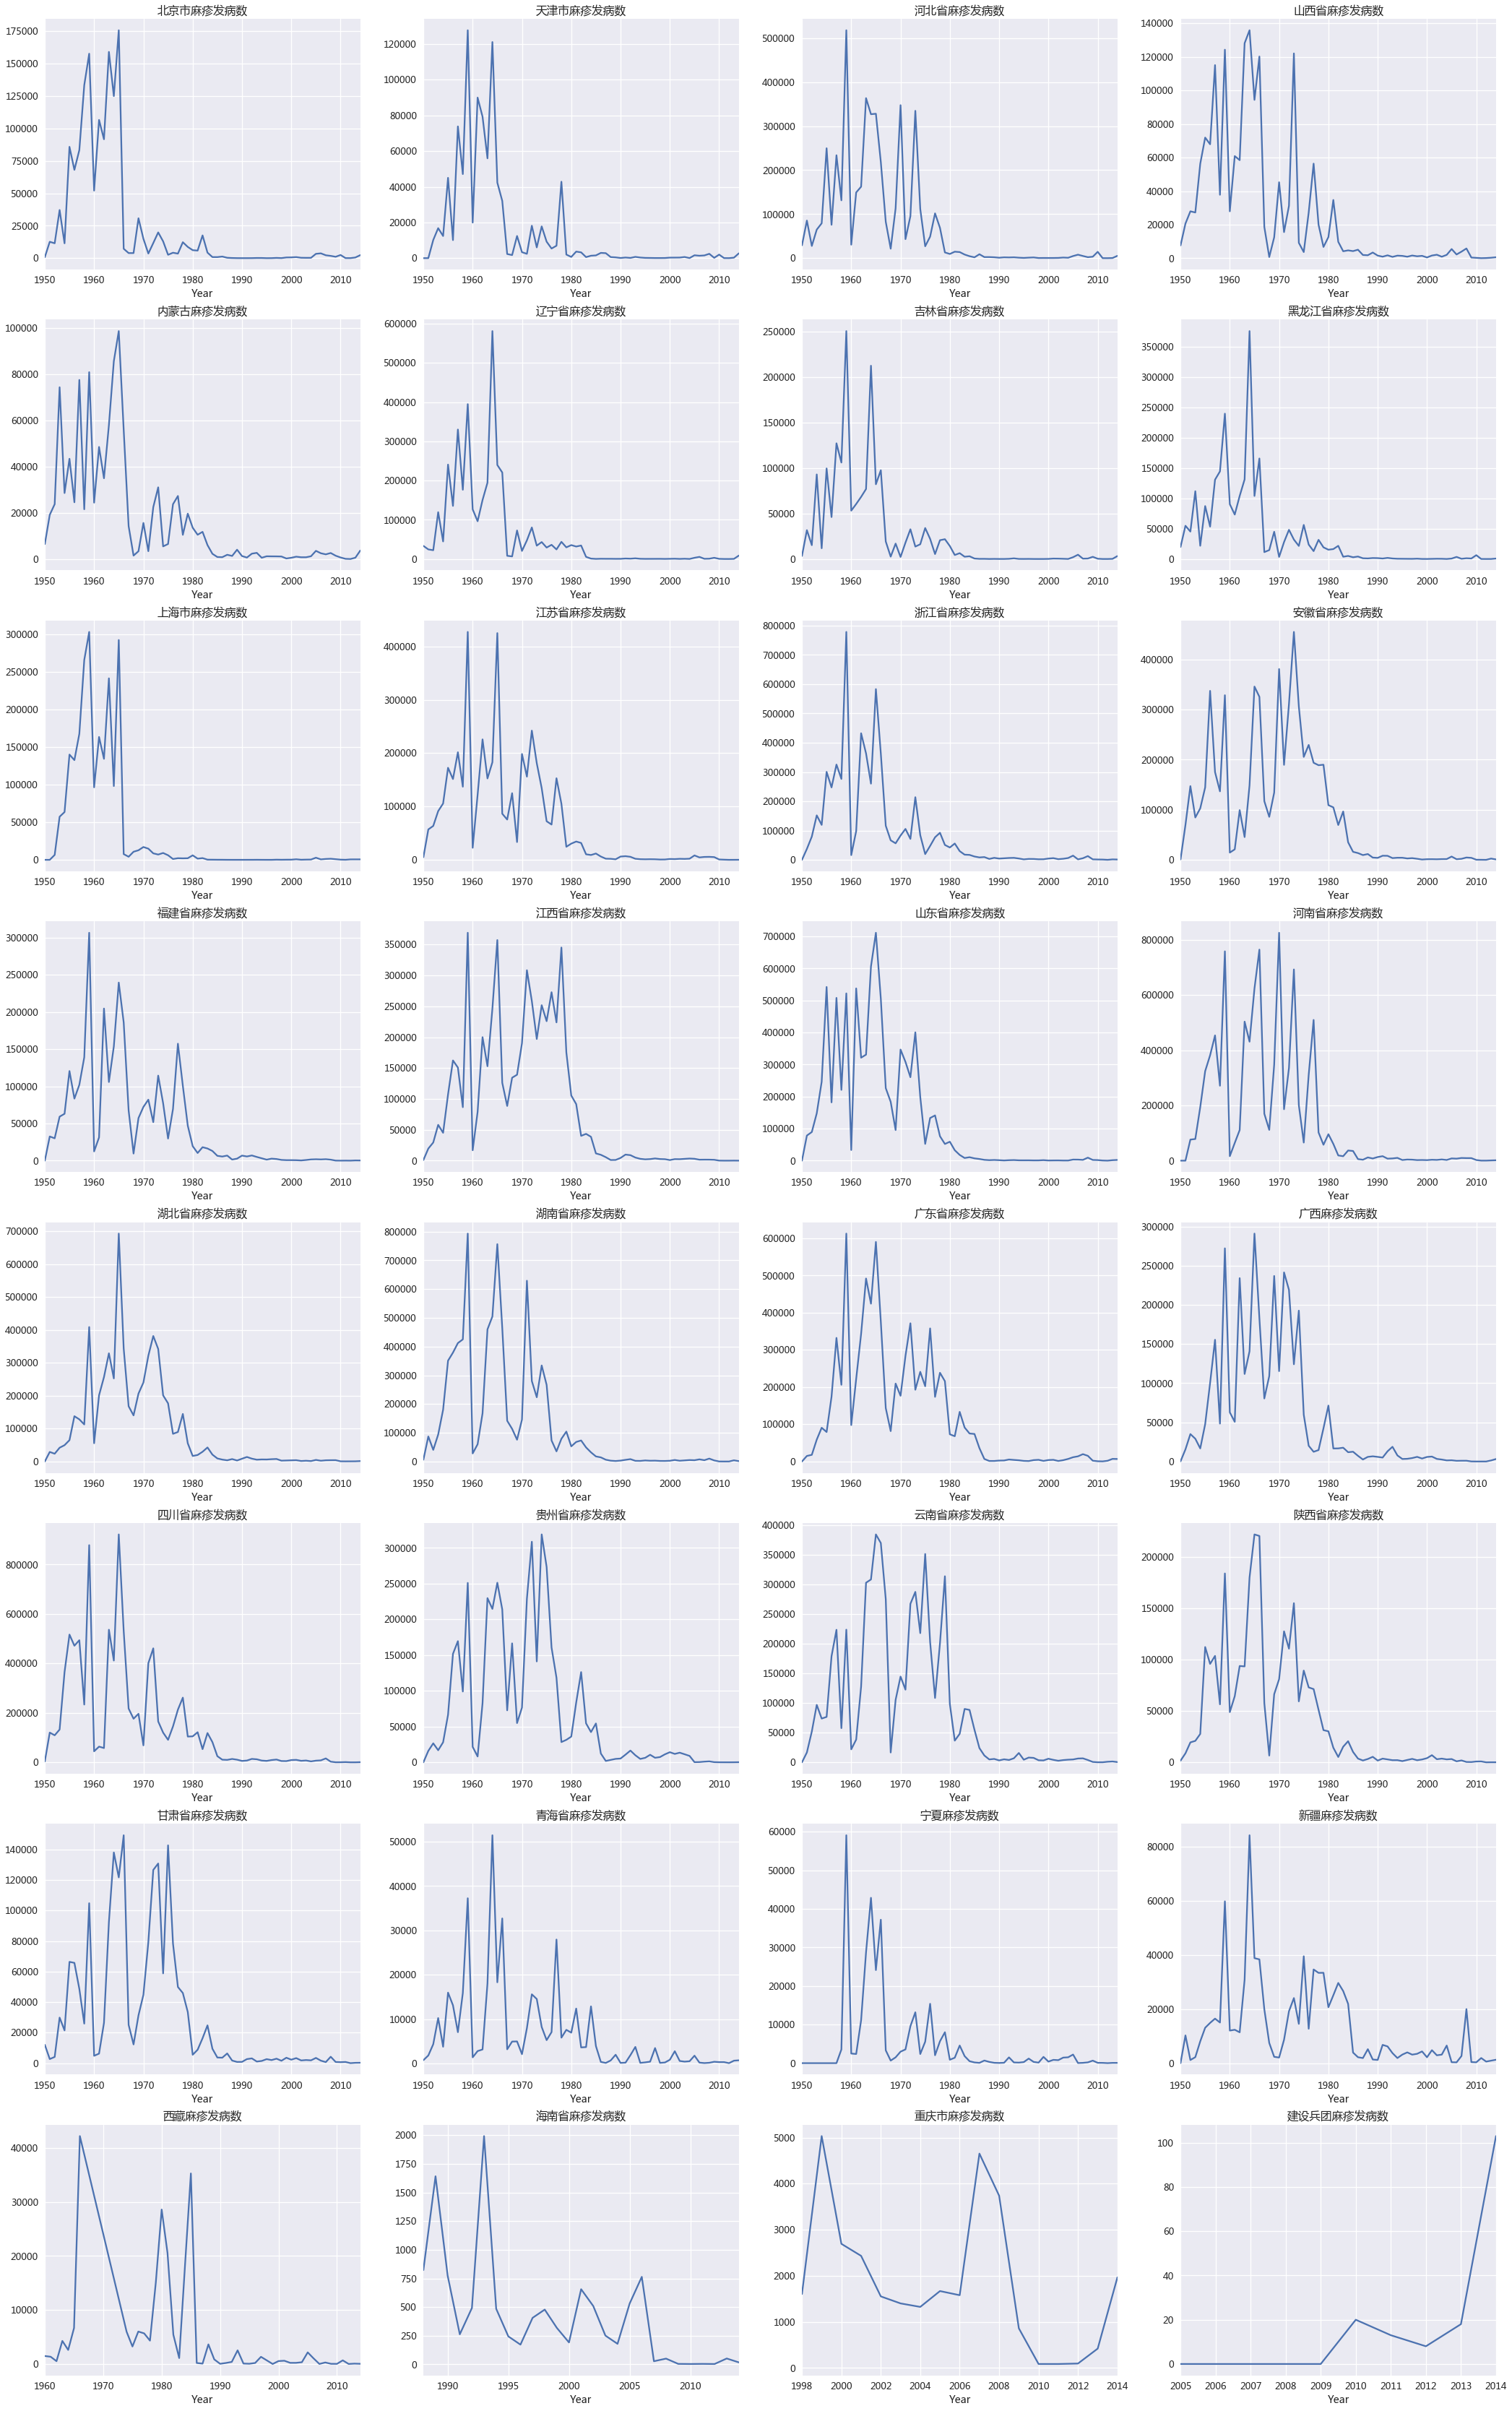

In [17]:
# data.reset_index(drop=True)
nrows = int(len(provinces)/4)
fig, axs =plt.subplots(nrows,4)
for i in range(len(provinces)):
    data = measles.ix[measles.Area == provinces[i],:]
    data.index = data.Year
    data.No_of_cases.plot(figsize=(36,60),ax=axs.reshape(-1)[i],title = provinces[i]+'麻疹发病数')

## 32个省市自治区1950-2014年麻疹死亡数

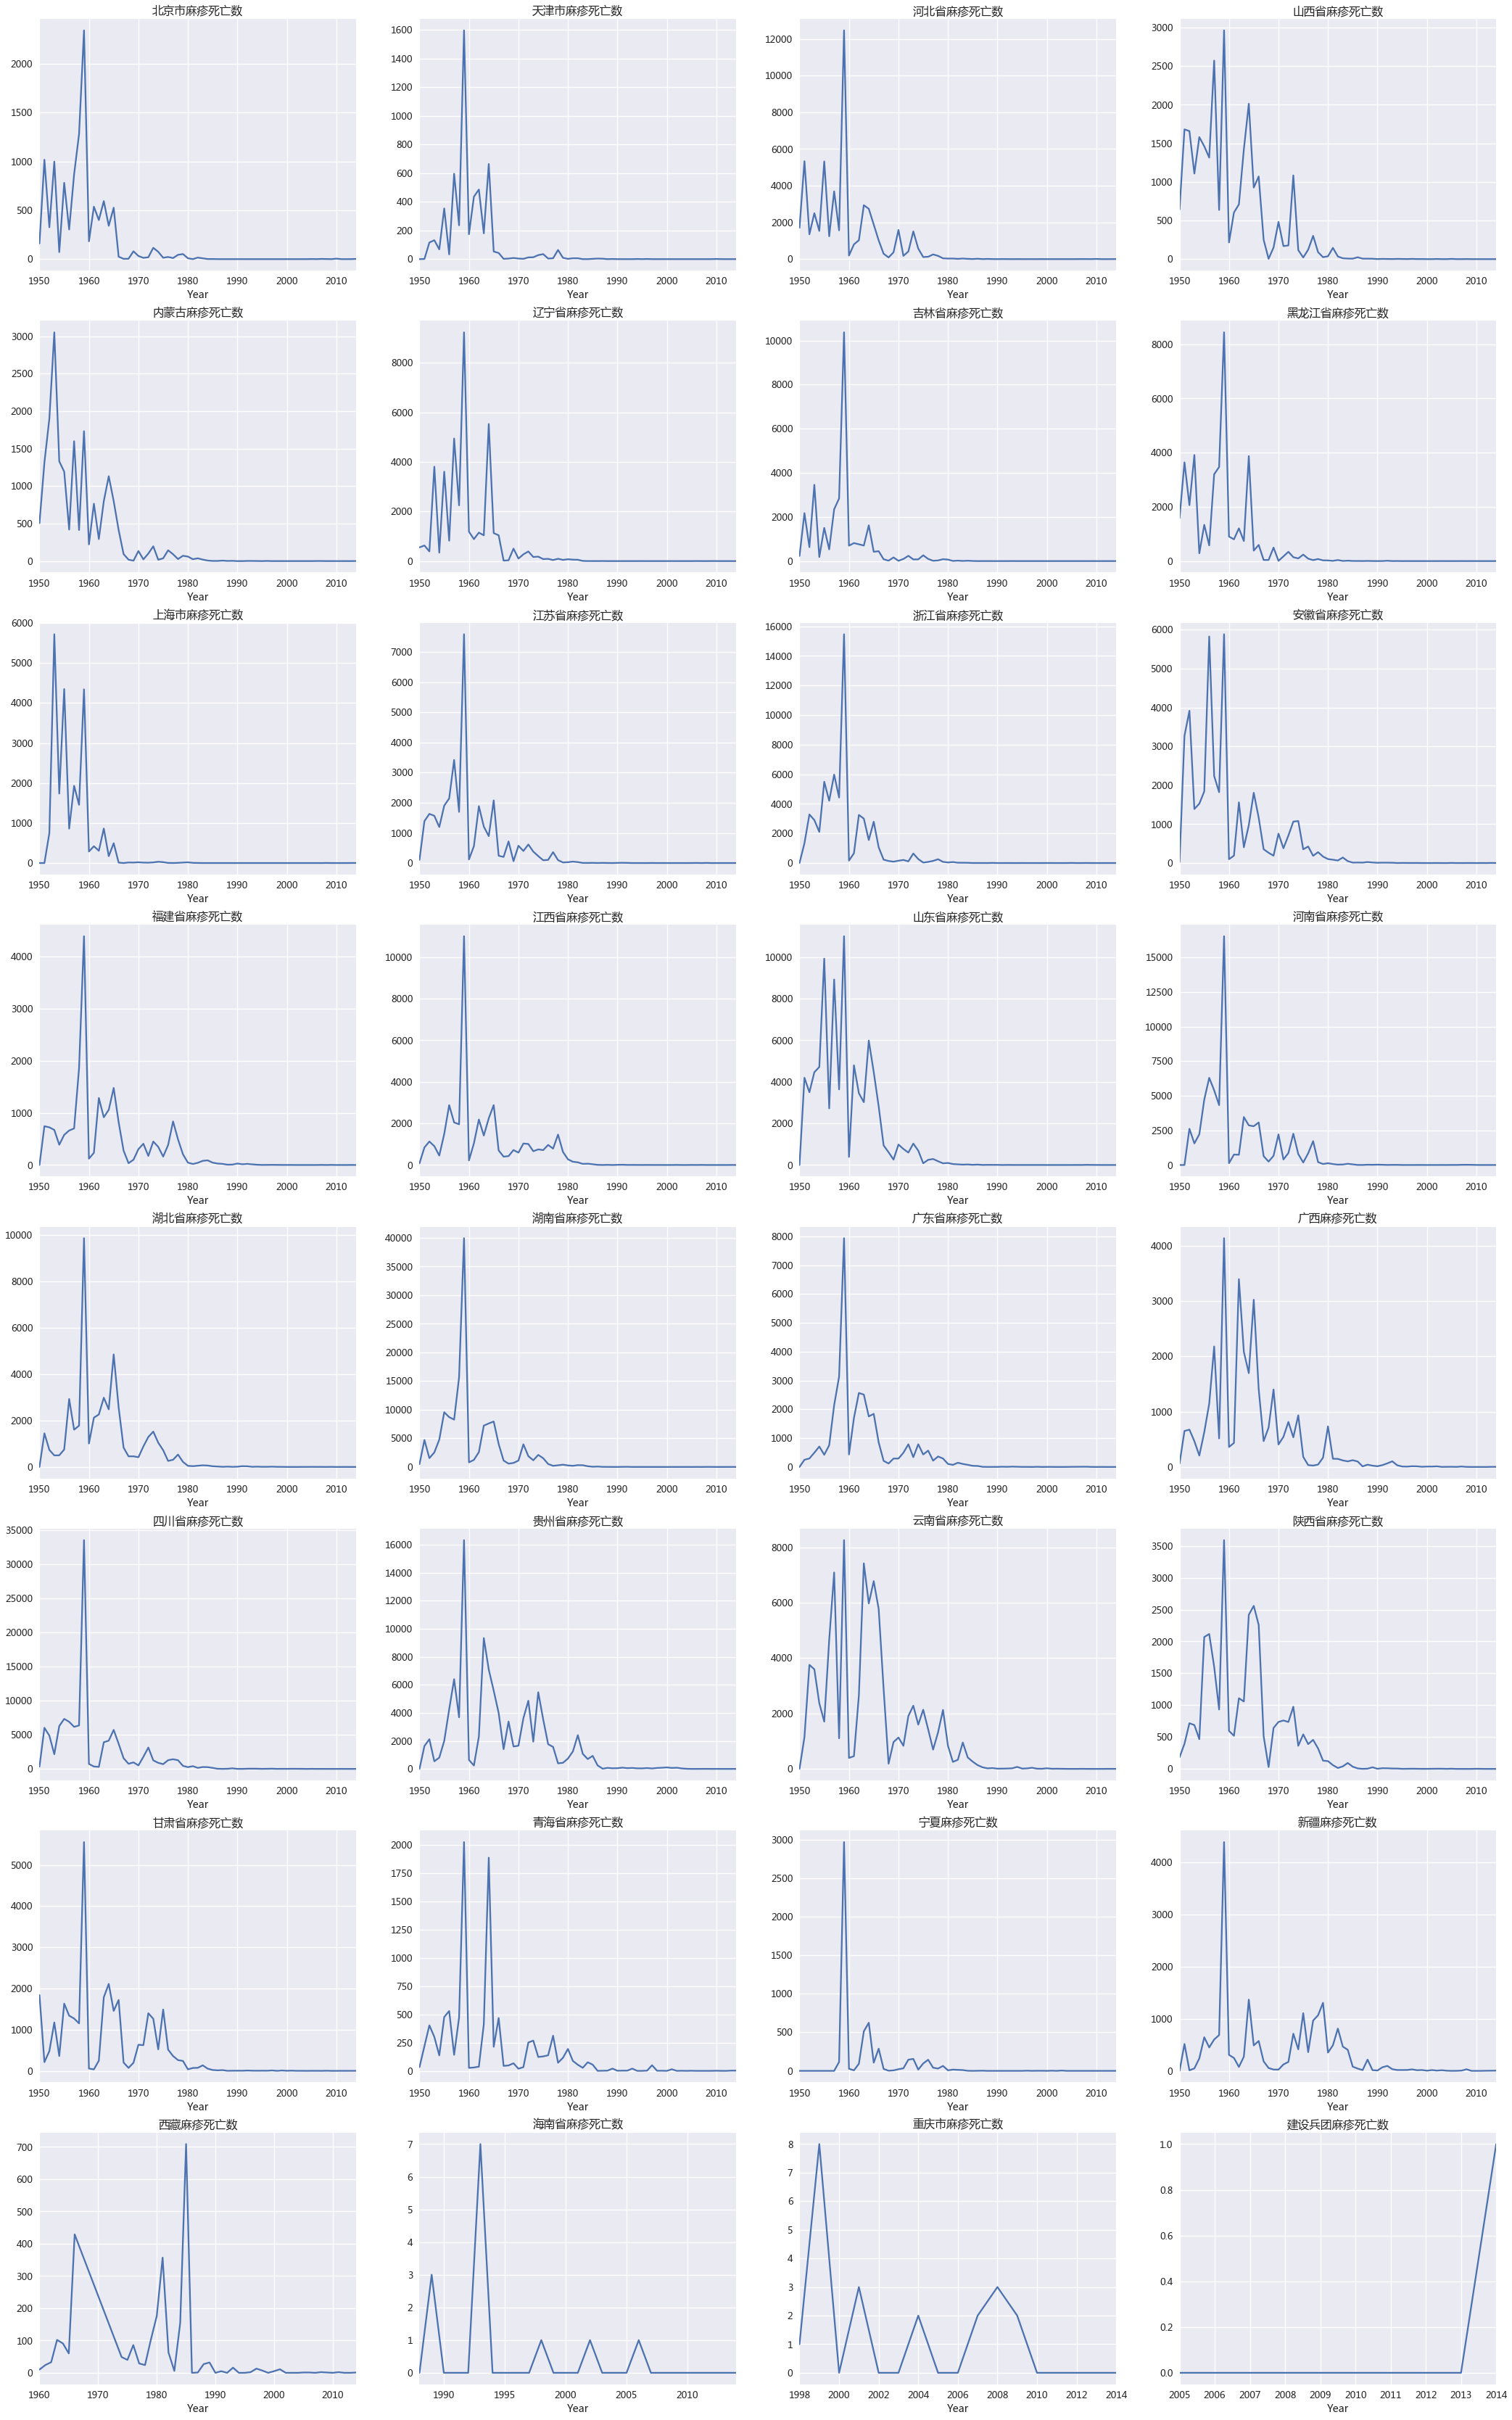

In [18]:
# data.reset_index(drop=True)
nrows = int(len(provinces)/4)
fig, axs =plt.subplots(nrows,4)
for i in range(len(provinces)):
    data = measles.ix[measles.Area == provinces[i],:]
    data.index = data.Year
    data.No_of_deaths.plot(figsize=(36,60),ax=axs.reshape(-1)[i],title = provinces[i]+'麻疹死亡数')

## 32个省市自治区1950-2014年麻疹发病率

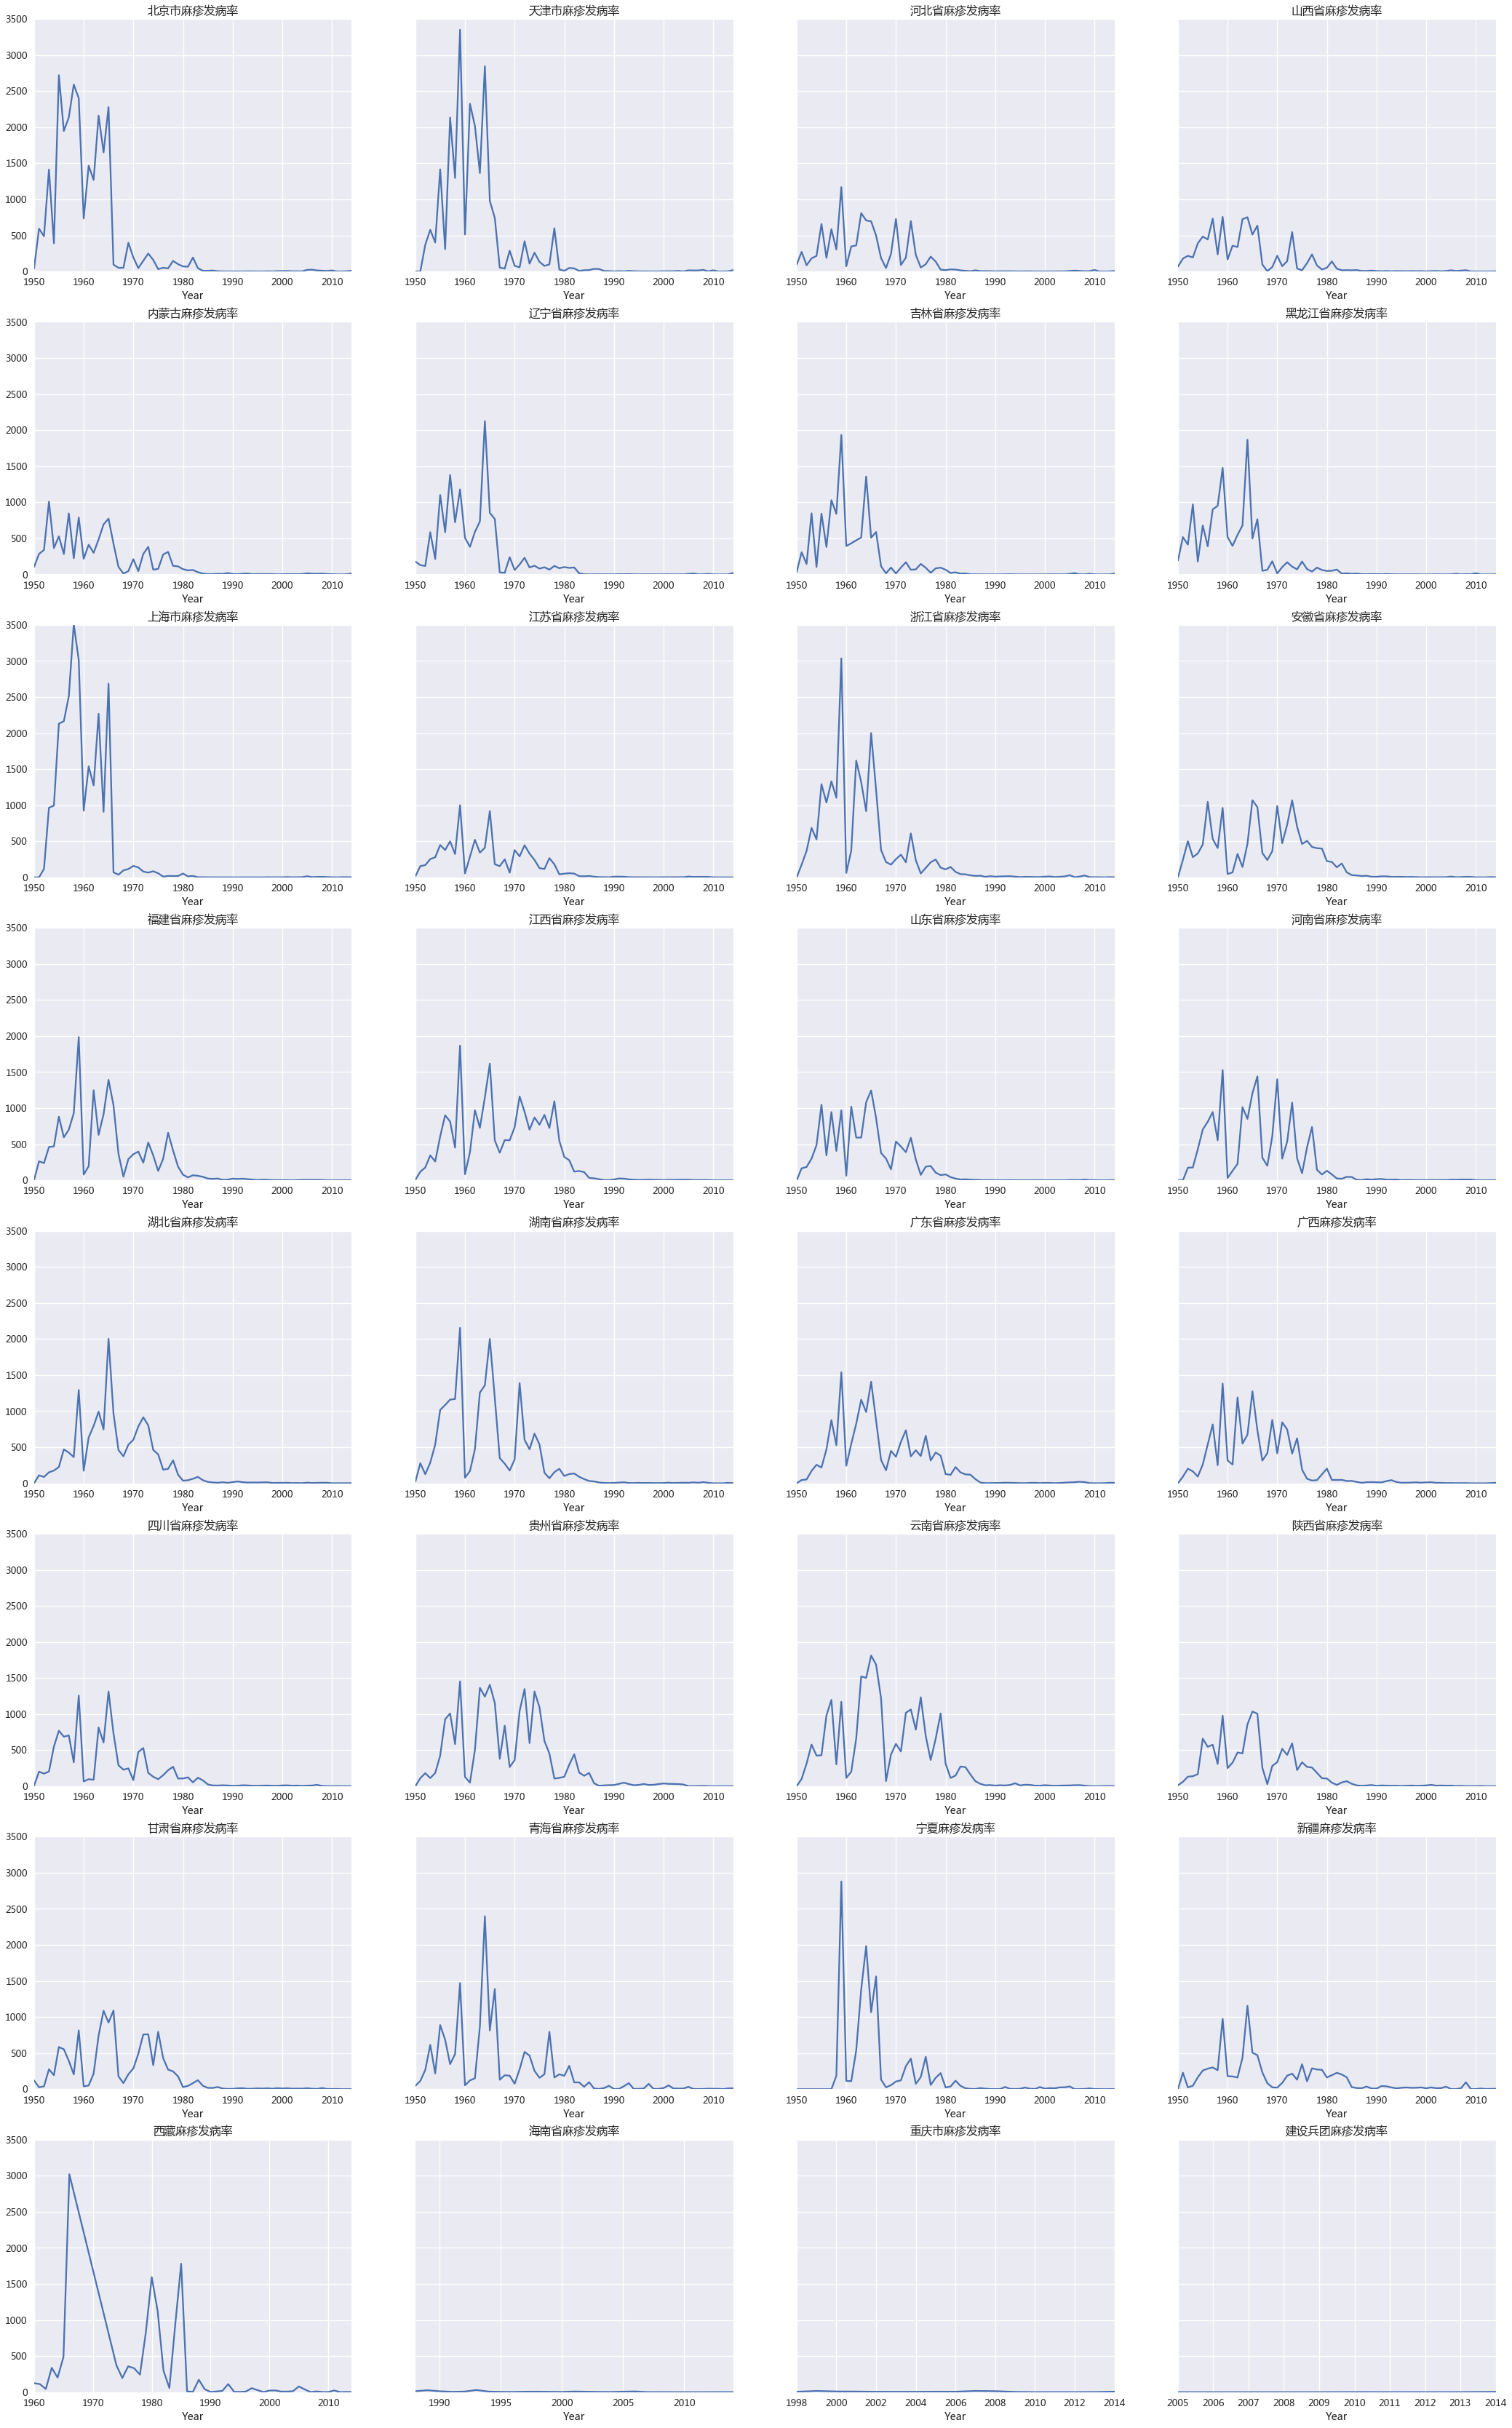

In [25]:
nrows = int(len(provinces)/4)
fig, axs =plt.subplots(nrows,4)
for i in range(len(provinces)):
    data = measles.ix[measles.Area == provinces[i],:]
    data.index = data.Year
    data.Incidence_rate.plot(figsize=(36,60),ax=axs.reshape(-1)[i],title = provinces[i]+'麻疹发病率',
                             ylim = [0,3500], sharey = True)

## 32个省市自治区1950-2014年麻疹死亡率

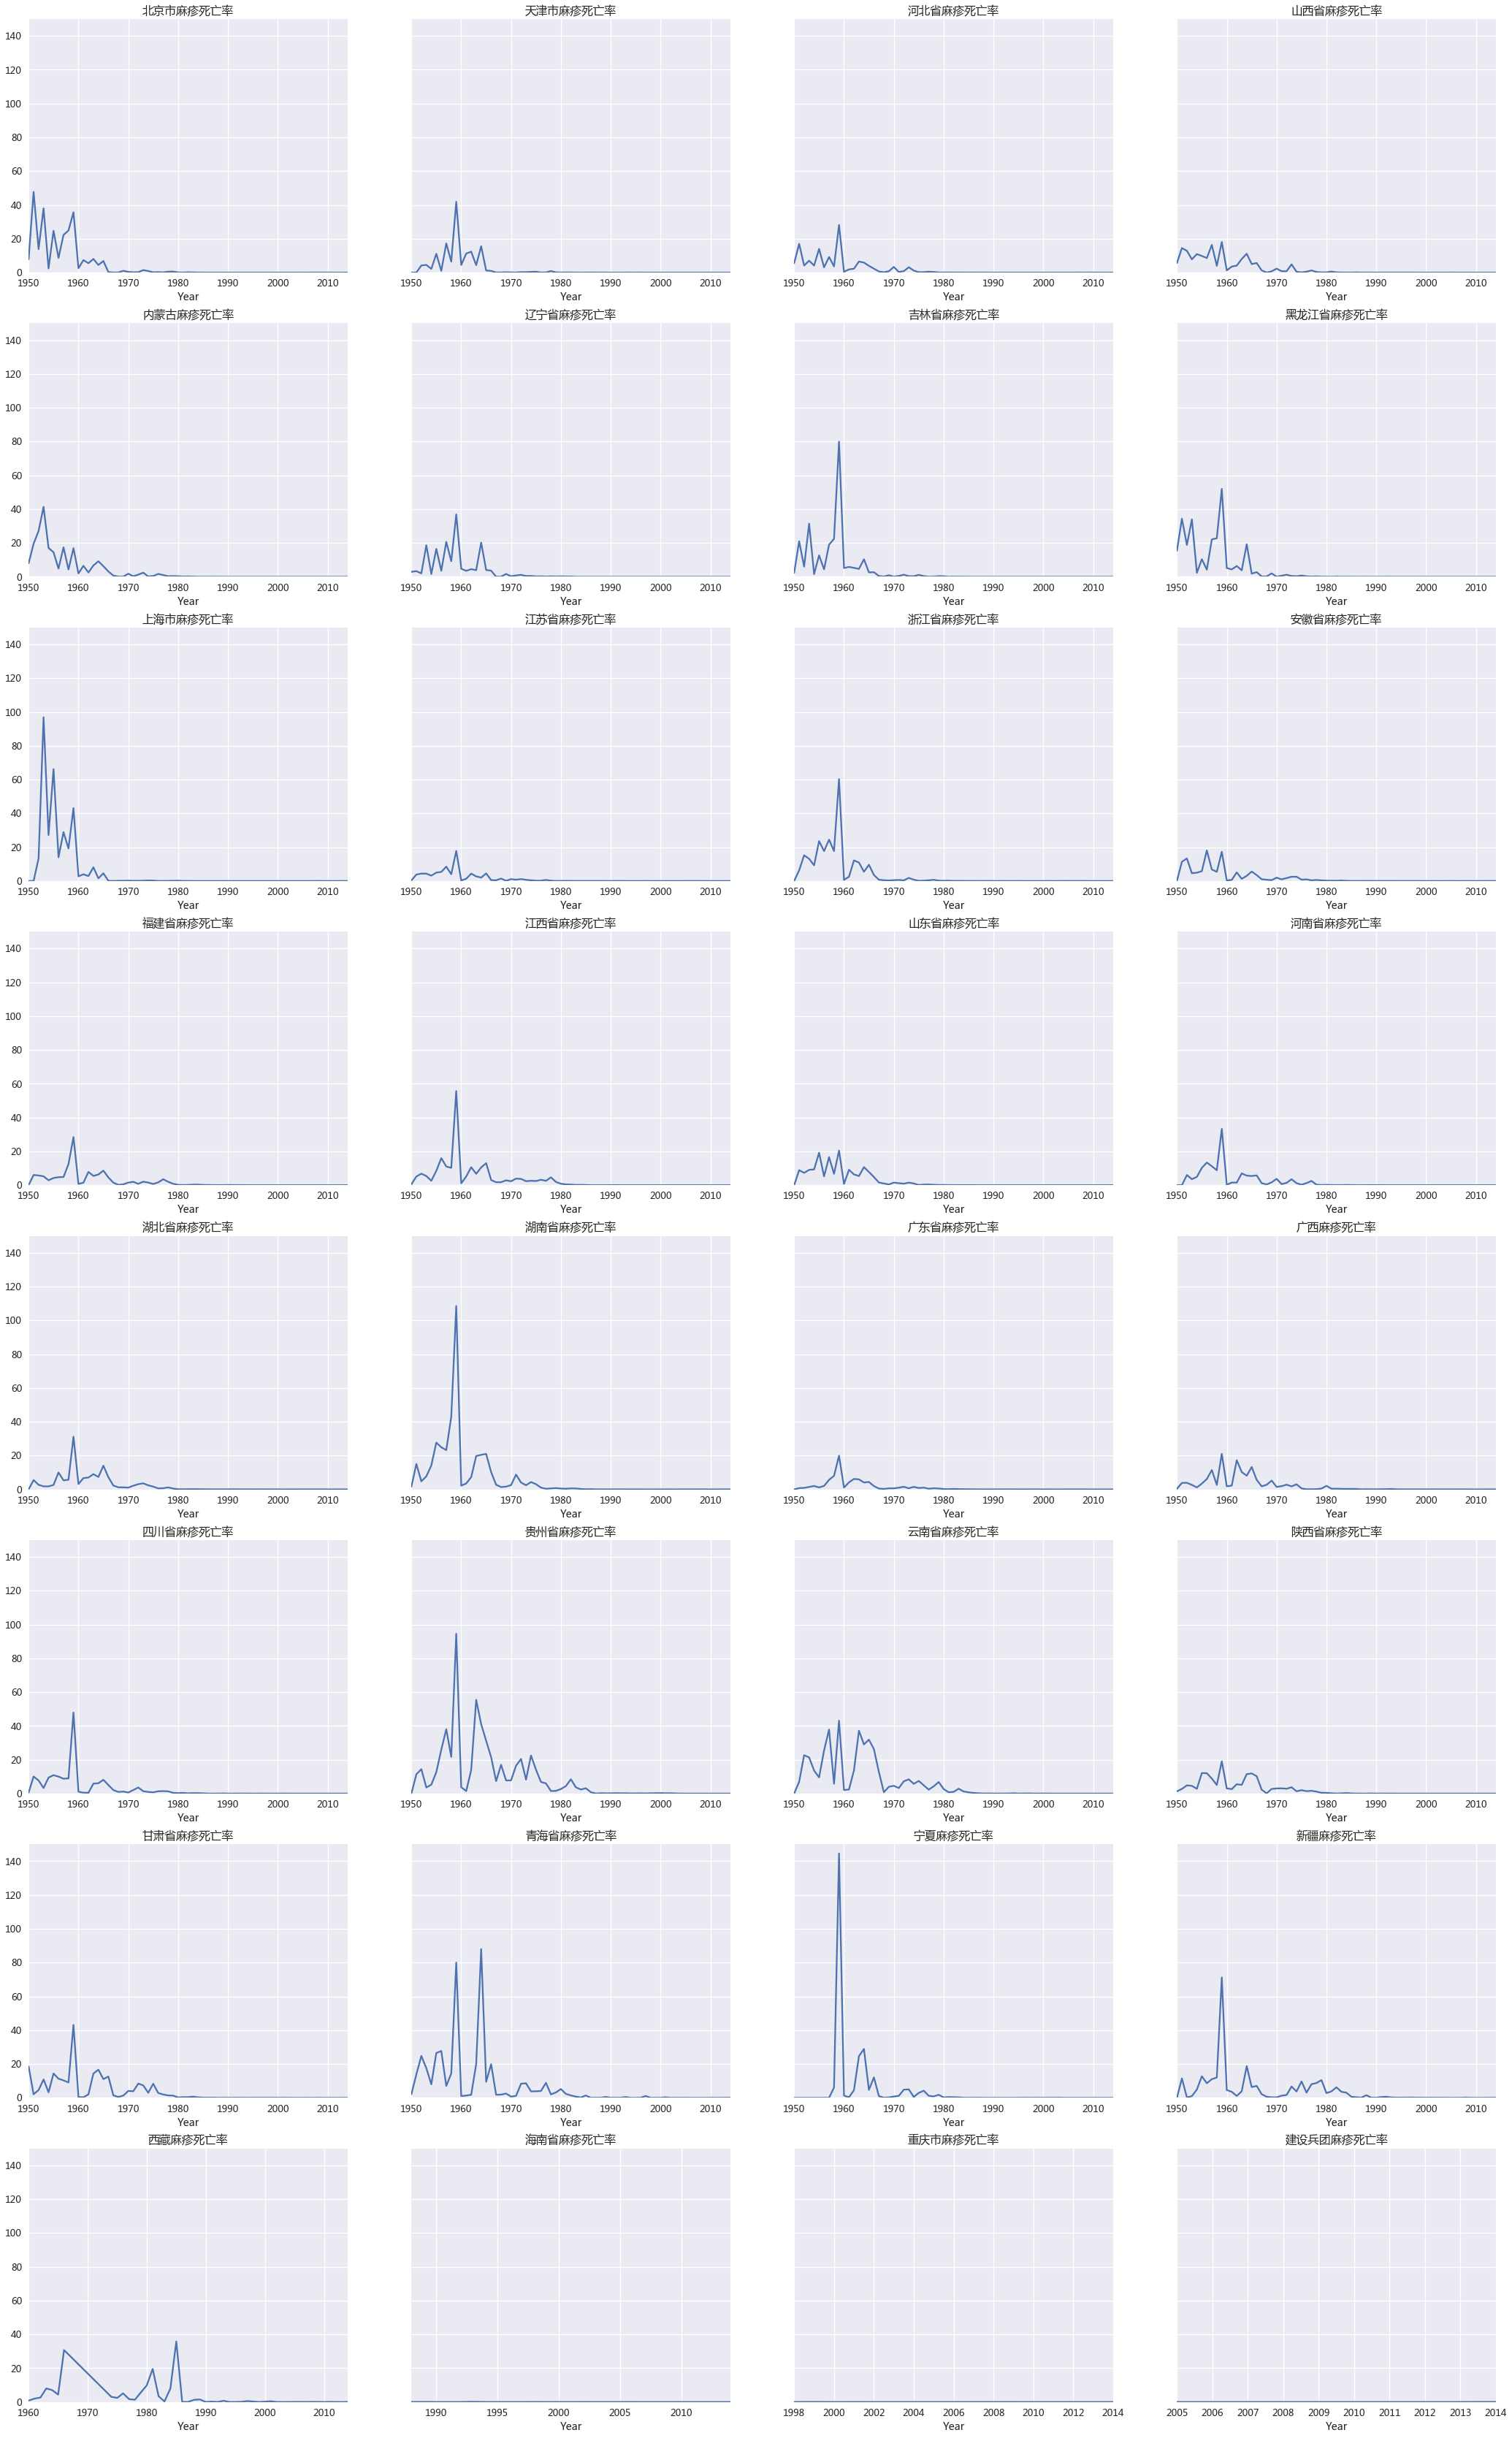

In [31]:
nrows = int(len(provinces)/4)
fig, axs =plt.subplots(nrows,4)
for i in range(len(provinces)):
    data = measles.ix[measles.Area == provinces[i],:]
    data.index = data.Year
    data.Death_rate.plot(figsize=(36,60),ax=axs.reshape(-1)[i],title = provinces[i]+'麻疹死亡率',
                        ylim = [0,150], sharey = True)